In [55]:
#import msparser
import os
import signal
import subprocess
import sys
import time
from tabulate import tabulate

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import EngFormatter

names = ["results-REL-pubs.txt", "results-REL-subs.txt", "results-BE-pubs.txt", "results-BE-subs.txt"]

descriptions = ["Publishers - Reliable streams",
                "Subscribers - Reliable streams",
                "Publishers - BE streams",
                "Subscribers - BE streams"]

total_usages_steady = []
topic_sizes = []
entities_sizes = []

In [56]:
for i in range(len(names)):
    with open(names[i],'r') as p:
        file = p.read()
    file = " ".join(file.split("\n")[1:])
    data = [int(x) for x in file.split(" ") if len(x)]
    data = np.reshape(data, (20, 3))
    
    ts = list(dict.fromkeys([x[1] for x in data]))
    es = list(dict.fromkeys([x[0] for x in data]))
    
    topic_sizes.append(ts)
    entities_sizes.append(es)
    
    usages_steady = []

    for entities_size in entities_sizes[i]:
        for topic_size in topic_sizes[i]:
            line = [x for x in data if x[0] == entities_size and x[1] == topic_size][0]

            min_buff = 400 if "XML" in names[i] else 150
            topic_size_adjs = min_buff if topic_size + 32 < min_buff else topic_size + 32

            usages_steady.append(line[2])  #Removing topic size buffer since topic data memory can be shared with data source
            
    usages_steady = np.reshape(usages_steady, (len(entities_sizes[i]), len(topic_sizes[i])))
    total_usages_steady.append(usages_steady)

In [57]:
print(topic_sizes)
print(entities_sizes)
print(total_usages_steady)

[[1, 342, 683, 1025, 1366], [1, 342, 683, 1025, 1366], [1, 123, 246, 368, 490], [1, 123, 246, 368, 490]]
[[1, 5, 10, 15], [1, 5, 10, 15], [1, 5, 10, 15], [1, 5, 10, 15]]
[array([[42869, 42833, 42849, 42925, 42833],
       [44621, 44633, 44629, 44501, 44517],
       [46687, 46683, 46695, 46679, 46703],
       [48797, 48721, 48769, 48773, 48765]]), array([[ 50843,  50767,  50807,  50807,  51031],
       [ 85502,  85511,  85535,  85739,  85523],
       [128941, 128929, 129129, 129141, 129121],
       [172555, 172403, 172527, 172519, 172539]]), array([[42717, 42681, 42681, 42681, 42681],
       [44369, 44333, 44329, 44333, 44321],
       [46427, 46395, 46403, 46399, 46411],
       [48501, 48469, 48417, 48453, 48465]]), array([[ 50851,  50775,  50775,  51031,  50775],
       [ 85203,  85175,  85175,  85175,  85171],
       [128613, 128561, 128577, 128569, 128769],
       [171991, 171955, 172135, 171939, 171963]])]


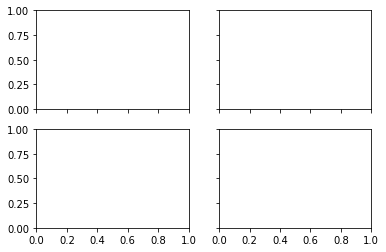

In [43]:
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row')
axs = axs.flatten()

formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")

In [ ]:
for i in range(len(names)):
    for j,n in zip(total_usages_steady[i], topic_sizes):
        axs[i].plot(entities_sizes, j, 'o-', markersize=1.5, linewidth=1, label="{:d} B".format(n))